In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('ggplot')

from datetime import date
from datetime import datetime

import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the cleaned dataset

cust_purchase_data = pd.read_csv('Customer_Purchase_Behaviour_data.csv')

In [4]:
#Columns present in data set

cust_purchase_data.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

In [5]:
cust_purchase_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


## Data Analysis on Customer Segments

In analysis of customer segments we will define some metrics of interest:
<br>
• Segment group who spends the most on chips (total sales), by describing customers by lifestage and how premium their
general purchasing behaviour is
<br>
• Number of customers in each segment
<br>
• Number of chips bought per customer by segment
<br>
• Average chip price by customer segment
<br>
<br>
We may look for more information. Examples are:
<br>
• The customer’s total spend over the period and total spend for each transaction to understand what
proportion of their grocery spend is on chips
<br>
• Proportion of customers in each customer segment overall to compare against the mix of customers
who purchase chips

### Total sales by Lifestage and Premium Customer

Calculation of total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments to describe <b>which customer segment has relatively more chip sales</b>.

In [6]:
cust_sales_demo = cust_purchase_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOT_SALES' : lambda sales : sum(sales)}).reset_index()

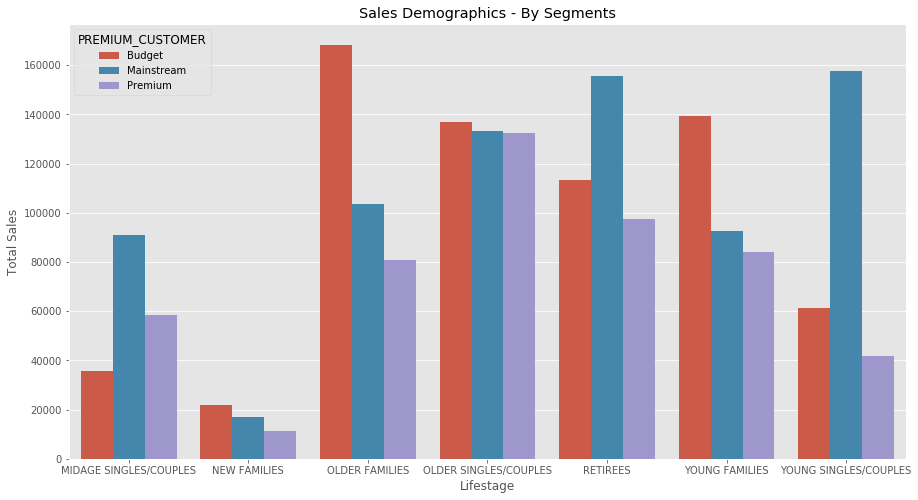

In [7]:
plt.figure(figsize=(15,8))

ax = plt.subplot(111)
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=cust_sales_demo , hue='PREMIUM_CUSTOMER')

ax.set_title('Sales Demographics - By Segments')
ax.set_xlabel('Lifestage')
ax.set_ylabel('Total Sales')

plt.show()

<b>Sales are mainly coming from Budget - Older Families, Mainstream - Young Singles / Couples and Mainstream - Retirees</b>

In [8]:
cust_sales_demo.sort_values(['TOT_SALES'], ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,168363.25
19,YOUNG SINGLES/COUPLES,Mainstream,157621.60
13,RETIREES,Mainstream,155677.05
15,YOUNG FAMILIES,Budget,139345.85
9,OLDER SINGLES/COUPLES,Budget,136769.80
10,OLDER SINGLES/COUPLES,Mainstream,133393.80
11,OLDER SINGLES/COUPLES,Premium,132263.15
12,RETIREES,Budget,113147.80
7,OLDER FAMILIES,Mainstream,103445.55
14,RETIREES,Premium,97646.05


### Number of Customers by Lifestage and Premium Customers

Analysis to find <b>if the higher sales are due to greater number of customers</b> who buy chips.

In [9]:
# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

cust_seg_num = cust_purchase_data[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates().groupby(
    ['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index()
cust_seg_num.rename(columns={0: 'Num_of_customers'}, inplace=True)
cust_seg_num.sort_values(['Num_of_customers'], ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,Num_of_customers
19,YOUNG SINGLES/COUPLES,Mainstream,8088
13,RETIREES,Mainstream,6479
10,OLDER SINGLES/COUPLES,Mainstream,4930
9,OLDER SINGLES/COUPLES,Budget,4929
11,OLDER SINGLES/COUPLES,Premium,4750
6,OLDER FAMILIES,Budget,4675
12,RETIREES,Budget,4454
15,YOUNG FAMILIES,Budget,4017
14,RETIREES,Premium,3872
18,YOUNG SINGLES/COUPLES,Budget,3779


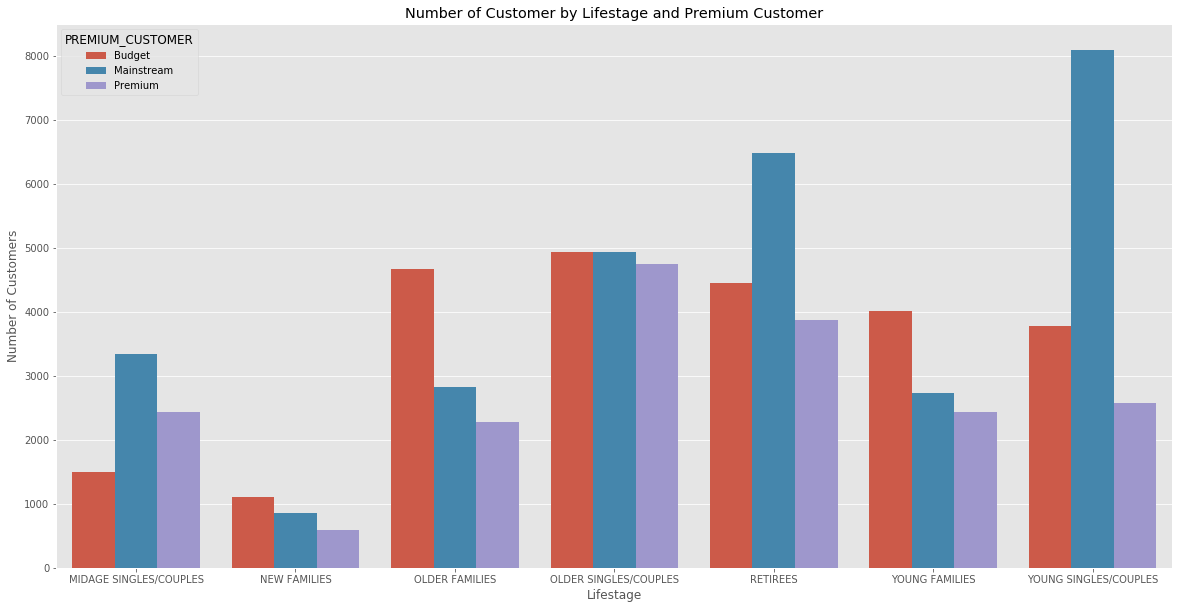

In [10]:
# Plotting the above dataframe results

plt.figure(figsize=(20,10))

ax = plt.subplot(111)
sns.barplot(x='LIFESTAGE' , y='Num_of_customers', data= cust_seg_num ,hue='PREMIUM_CUSTOMER')

ax.set_title('Number of Customer by Lifestage and Premium Customer')
ax.set_xlabel('Lifestage')
ax.set_ylabel('Number of Customers')

plt.show()

For Mainstream - Young Singles / Couples and Mainstream - Retirees the number of customers is relatively more than other customer segments. This can be a major factor for greater sales to these customer segments. However this is not a major driver for Budget - Older Familes customer segment.

### Average Number of Units per Customer by Lifestage and Premium Customer

Higher sales may also be driven by the number of units of chips bought by the customer. Need to analyze this factor for each customer segment

In [11]:
nUnits_per_cust = cust_purchase_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'LYLTY_CARD_NBR' : ['nunique'], 'PROD_QTY' : ['sum']
})

# To flatten Multi-level index

nUnits_per_cust.columns = ["_".join(col).strip() for col in nUnits_per_cust.columns.values]

# Reseting index

nUnits_per_cust = nUnits_per_cust.reset_index()
nUnits_per_cust['Avg_nUnits'] = nUnits_per_cust['PROD_QTY_sum'] / nUnits_per_cust['LYLTY_CARD_NBR_nunique']

In [12]:
nUnits_per_cust

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR_nunique,PROD_QTY_sum,Avg_nUnits
0,MIDAGE SINGLES/COUPLES,Budget,1504,9496,6.313830
1,MIDAGE SINGLES/COUPLES,Mainstream,3340,22699,6.796108
2,MIDAGE SINGLES/COUPLES,Premium,2431,15526,6.386672
3,NEW FAMILIES,Budget,1112,5571,5.009892
4,NEW FAMILIES,Mainstream,849,4319,5.087161
5,NEW FAMILIES,Premium,588,2957,5.028912
6,OLDER FAMILIES,Budget,4675,45065,9.639572
7,OLDER FAMILIES,Mainstream,2831,27756,9.804309
8,OLDER FAMILIES,Premium,2273,21771,9.578091
9,OLDER SINGLES/COUPLES,Budget,4929,35220,7.145466


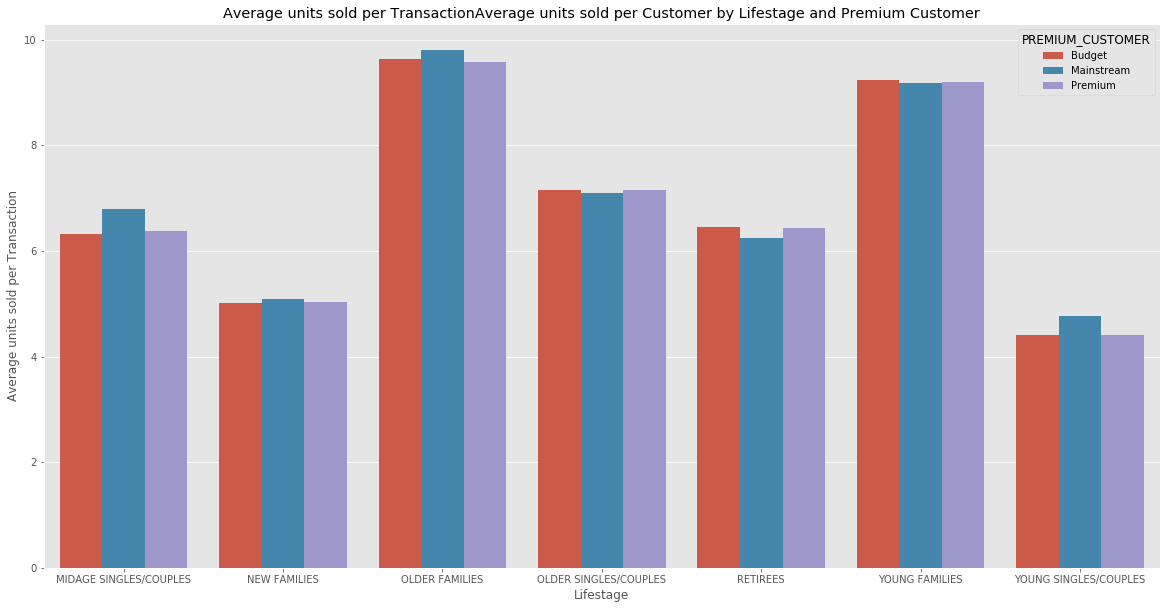

In [13]:
# Plotting the above dataframe results

plt.figure(figsize=(20,10))

ax = plt.subplot(111)
sns.barplot(x='LIFESTAGE' , y='Avg_nUnits', data= nUnits_per_cust ,hue='PREMIUM_CUSTOMER')

ax.set_title('Average units sold per TransactionAverage units sold per Customer by Lifestage and Premium Customer')
ax.set_xlabel('Lifestage')
ax.set_ylabel('Average units sold per Transaction')

plt.show()

<b>Older Families and Young Families tend to buy more chips per customer.</b>

### Average Price per unit chips bought by each customer segment

The average price per unit of chips bought by each customer segment is also an inportant factor for higher sales.

In [14]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

avg_units = cust_purchase_data.groupby(['LIFESTAGE' , 'PREMIUM_CUSTOMER']).agg(
    {'PROD_QTY' : lambda q : sum(q), 'TOT_SALES' : lambda s : sum(s)}).reset_index()
avg_units['Average_Price_per_unit'] = avg_units['TOT_SALES'] / avg_units['PROD_QTY']
avg_units

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES,Average_Price_per_unit
0,MIDAGE SINGLES/COUPLES,Budget,9496,35514.80,3.739975
1,MIDAGE SINGLES/COUPLES,Mainstream,22699,90803.85,4.000346
2,MIDAGE SINGLES/COUPLES,Premium,15526,58432.65,3.763535
3,NEW FAMILIES,Budget,5571,21928.45,3.936178
4,NEW FAMILIES,Mainstream,4319,17013.90,3.939315
5,NEW FAMILIES,Premium,2957,11491.10,3.886067
6,OLDER FAMILIES,Budget,45065,168363.25,3.736009
7,OLDER FAMILIES,Mainstream,27756,103445.55,3.726962
8,OLDER FAMILIES,Premium,21771,80658.40,3.704855
9,OLDER SINGLES/COUPLES,Budget,35220,136769.80,3.883299


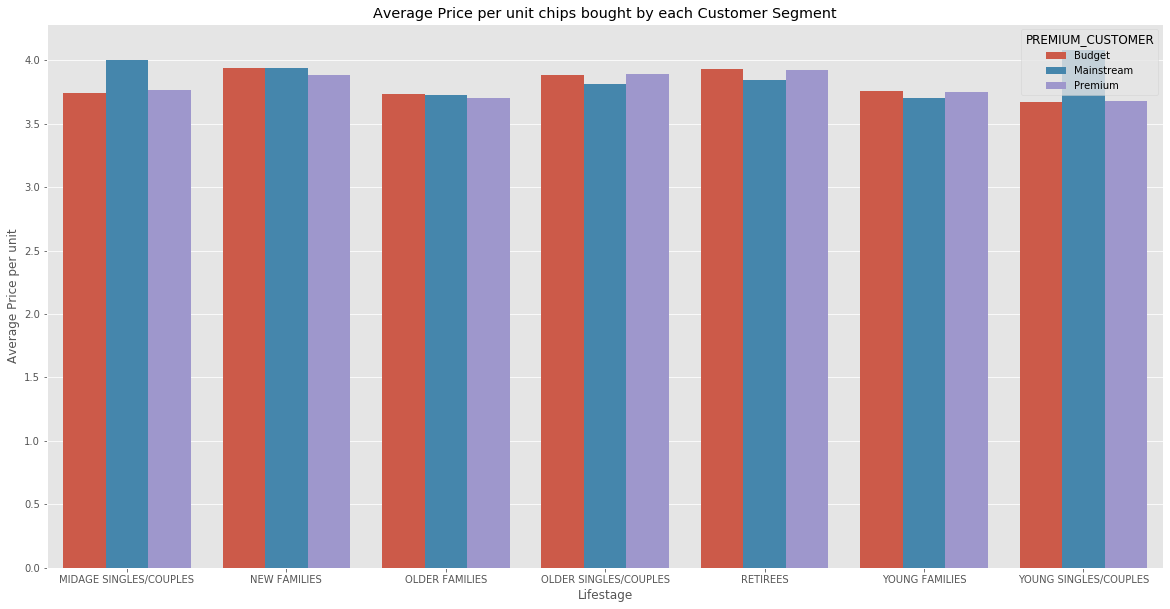

In [15]:
plt.figure(figsize=(20,10))

ax = plt.subplot(111)
sns.barplot(x='LIFESTAGE' , y='Average_Price_per_unit', data= avg_units,hue='PREMIUM_CUSTOMER')

ax.set_xlabel('Lifestage')
ax.set_ylabel('Average Price per unit')
ax.set_title('Average Price per unit chips bought by each Customer Segment')

plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared
to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own
consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts.

As the difference between the <b>average price per unit is not significantly large</b>, we need to perform <b>t-Test</b> to find out whether this difference is statistically different

# t-Test

We need to perform independent t-Test between mainstream vs premium budget midage and young singles and couples

In [16]:
mainstream_sales = cust_purchase_data[(cust_purchase_data['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) &
                   (cust_purchase_data['PREMIUM_CUSTOMER'] =="Mainstream")]
mainstream_sales['price'] = mainstream_sales['TOT_SALES']/mainstream_sales['PROD_QTY']

In [17]:
non_mainstream_sales = cust_purchase_data[(cust_purchase_data['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) &
                   ~(cust_purchase_data['PREMIUM_CUSTOMER'] =="Mainstream")]

non_mainstream_sales['price'] = non_mainstream_sales['TOT_SALES']/non_mainstream_sales['PROD_QTY']

In [18]:
stats_val , p_value = stats.ttest_ind(a=mainstream_sales['price'], b=non_mainstream_sales['price'])

In [19]:
stats_val

40.83413678791155

In [20]:
p_value

0.0

In [21]:
np.mean(mainstream_sales['price'])

4.045586042532191

In [22]:
np.mean(non_mainstream_sales['price'])

3.6881654438609015

The t-test results in a p-value < 2.2e-16, i.e. the unit price for mainstream, young and mid-age singles and
couples are significantly higher than that of budget or premium, young and midage singles and couples

## Deep Dive into specific customer segments for insights

Target Customer segments should be the ones which contribute the most to the sales. The target segments should be retained for further increase in sales revenue and volume / quantity 

Let's deep drive into the <b>Mainstream - Young Singles / Couples Customer Segment</b>. Also we need to find out the type of product popular within this customer segment.

In [23]:
#Filter Mainstream - Young Singles / Couples Customer Segment

seg1 = cust_purchase_data[(cust_purchase_data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") &
                   (cust_purchase_data['PREMIUM_CUSTOMER'] =="Mainstream")]

In [24]:
other_seg = cust_purchase_data[~((cust_purchase_data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") &
                   (cust_purchase_data['PREMIUM_CUSTOMER'] =="Mainstream"))]

Brand afinity comparision between the two groups of population segment

In [25]:
prod_qty_seg = seg1['PROD_QTY'].sum()
prod_qty_other_seg = other_seg['PROD_QTY'].sum()

In [26]:
qty_seg1_by_brand = seg1.groupby(['BRAND']).agg({'PROD_QTY' : lambda q : sum(q)/prod_qty_seg})
qty_seg1_by_brand.rename(columns={'PROD_QTY' : 'Target Segment'}, inplace=True)

qty_other_by_brand = other_seg.groupby(['BRAND']).agg({'PROD_QTY' : lambda q : sum(q)/prod_qty_other_seg})
qty_other_by_brand.rename(columns={'PROD_QTY' : 'Other Segment'}, inplace=True)

In [27]:
qty_seg1_by_brand

,Target Segment
BRAND,
BURGER,0.002744
CCS,0.010484
CHEETOS,0.007533
CHEEZELS,0.016851
COBS,0.041856
DORITOS,0.122877
FRENCH,0.003702
GRNWVES,0.030674
INFUZIONS,0.060649


In [28]:
qty_other_by_brand

,Other Segment
BRAND,
BURGER,0.006145
CCS,0.017602
CHEETOS,0.011240
CHEEZELS,0.017370
COBS,0.036375
DORITOS,0.105277
FRENCH,0.005364
GRNWVES,0.029052
INFUZIONS,0.053157


In [29]:
affinity_brand_comp = pd.merge(qty_seg1_by_brand, qty_other_by_brand, left_on='BRAND', right_on='BRAND', how='inner')

In [30]:
affinity_brand_comp['affinityToBrand'] = affinity_brand_comp['Target Segment']/affinity_brand_comp['Other Segment']

In [31]:
affinity_brand_comp.sort_values(['affinityToBrand'] , ascending=False)

,Target Segment,Other Segment,affinityToBrand
BRAND,,,
TYRRELLS,0.029587,0.023933,1.236235
TWISTIES,0.043306,0.035283,1.227401
KETTLE,0.185649,0.154216,1.203823
TOSTITOS,0.042581,0.035377,1.203638
OLD,0.041598,0.034753,1.196958
PRINGLES,0.111980,0.093743,1.194536
DORITOS,0.122877,0.105277,1.167176
COBS,0.041856,0.036375,1.150700
INFUZIONS,0.060649,0.053157,1.140947


We can see that :<br>
• Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population<br>
• Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population

#### Preferred pack size purchased by target segment compared to other cutomer segments

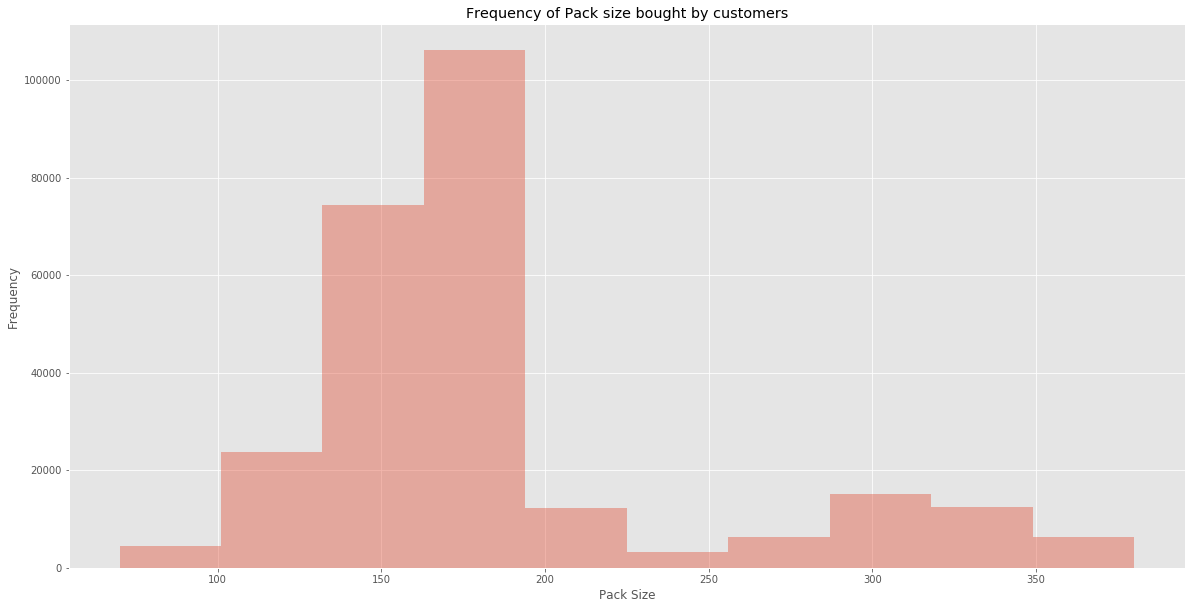

In [32]:
# frequency of PACK_SIZE
plt.figure(figsize=(20,10))

ax = plt.subplot(111)
sns.distplot(cust_purchase_data['PACK_SIZE'], kde=False, bins=10)

ax.set_title('Frequency of Pack size bought by customers')
ax.set_xlabel('Pack Size')
ax.set_ylabel('Frequency')

plt.show()

In [33]:
pack_size_freq = cust_purchase_data['PACK_SIZE'].value_counts().reset_index()

In [34]:
pack_size_freq.rename(columns={'index' : 'PACK_SIZE' , 'PACK_SIZE' : 'Frequency'}, inplace=True)

In [35]:
pack_size_freq.sort_values(['Frequency'], ascending=False)

,PACK_SIZE,Frequency
0,175,66390
1,150,43131
2,134,25102
3,110,22387
4,170,19983
5,165,15297
6,300,15166
7,330,12540
8,380,6416
9,270,6285


We need to analyze whether our <b>target segment</b> likes to buy <b>bigger / larger packs</b> of chips.

In [36]:
#Preferred pack size compared to other customer segments

pack_size_seg1_by_brand = seg1.groupby(['PACK_SIZE']).agg({'PROD_QTY' : lambda q : sum(q)/prod_qty_seg})
pack_size_seg1_by_brand.rename(columns={'PROD_QTY' : 'Target Segment'}, inplace=True)

pack_size_other_by_brand = other_seg.groupby(['PACK_SIZE']).agg({'PROD_QTY' : lambda q : sum(q)/prod_qty_other_seg})
pack_size_other_by_brand.rename(columns={'PROD_QTY' : 'Other Segment'}, inplace=True)

In [37]:
affinity_pack_comp = pd.merge(pack_size_seg1_by_brand, pack_size_other_by_brand, left_on='PACK_SIZE', right_on='PACK_SIZE'
                              , how='inner')

In [38]:
affinity_pack_comp['affinityToPack'] = affinity_pack_comp['Target Segment']/affinity_pack_comp['Other Segment']

In [39]:
affinity_pack_comp.sort_values(['affinityToPack'] , ascending=False)

,Target Segment,Other Segment,affinityToPack
PACK_SIZE,,,
270,0.029846,0.023377,1.276694
380,0.030156,0.023832,1.265361
330,0.057465,0.046727,1.229814
134,0.111980,0.093743,1.194536
110,0.099658,0.083642,1.191482
210,0.027309,0.023401,1.167002
135,0.013849,0.012180,1.136997
250,0.013460,0.011905,1.130611
170,0.075740,0.075440,1.003980


Mainstream young singles/couples are 27 % more likely to purchase a 270 g pack of chips compared
to other customer segments but let’s dive into <b>what brands sell this pack size.</b>

In [40]:
cust_purchase_data[cust_purchase_data['PACK_SIZE']==270]['PROD_NAME'].drop_duplicates()

64     Twisties Cheese     270g
123        Twisties Chicken270g
Name: PROD_NAME, dtype: object

<b>Twisties are the only brand offering 270 g packs</b> and so this may instead be reflecting a higher likelihood of
purchasing Twisties.

Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees
is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance
by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.

## Experimentation and Uplift Testing

The store numbers 77, 86 and 88 are selected as trial stores and we want control stores to be established stores that are operational for the entire observation period (Feb, 2019 - June, 2019).

We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

In [41]:
# Creating a MONTH_ID column by extracting year and month from DATE_DT column

cust_purchase_data['DATE_DT'] = pd.to_datetime(cust_purchase_data['DATE'], format='%Y-%m-%d')
cust_purchase_data['year'] = cust_purchase_data['DATE_DT'].dt.year
cust_purchase_data['month'] = cust_purchase_data['DATE_DT'].dt.month

cust_purchase_data['MONTH_ID'] = (cust_purchase_data['year']*100)+cust_purchase_data['month']

In [42]:
# Store Metrics like total sales and total product units sold by each store over time

store_info = cust_purchase_data.groupby(['MONTH_ID', 'STORE_NBR']).agg({'TOT_SALES' : lambda s : sum(s),
                                                                        'PROD_QTY' : lambda q : sum(q)
                                                                       }).reset_index()

In [43]:
store_info.head()

,MONTH_ID,STORE_NBR,TOT_SALES,PROD_QTY
0,201807,1,206.9,62
1,201807,2,150.8,46
2,201807,3,1205.7,271
3,201807,4,1399.9,318
4,201807,5,812.0,240


In [44]:
# Number of customers by each store over time

cust_num = cust_purchase_data[['MONTH_ID', 'STORE_NBR', 'LYLTY_CARD_NBR']].drop_duplicates().groupby(
    ['MONTH_ID', 'STORE_NBR']).size().reset_index()

In [45]:
cust_num.rename(columns={0: 'Customer_Count'}, inplace=True)

In [46]:
cust_num.head()

,MONTH_ID,STORE_NBR,Customer_Count
0,201807,1,49
1,201807,2,39
2,201807,3,112
3,201807,4,128
4,201807,5,93


In [47]:
# Number of transactions happened by each store over time

trans_num = cust_purchase_data[['MONTH_ID', 'STORE_NBR', 'TXN_ID']].drop_duplicates().groupby(
    ['MONTH_ID', 'STORE_NBR']).size().reset_index()

In [48]:
trans_num.rename(columns={0: 'Trans_Count'}, inplace=True)

In [49]:
# Merging all the above dataframes in to single dataframe 'store_metrics' containing store metrics of interest

store_metrics = pd.merge(store_info, cust_num, left_on = ['MONTH_ID', 'STORE_NBR'], right_on=['MONTH_ID', 'STORE_NBR'],
                         how='inner')

In [50]:
store_metrics = pd.merge(store_metrics, trans_num, left_on = ['MONTH_ID', 'STORE_NBR'], right_on=['MONTH_ID', 'STORE_NBR'],
                         how='inner')

In [51]:
# Calculating Average chip price per transaction

store_metrics['Avg_chips_price_per_trans'] = store_metrics['TOT_SALES']/store_metrics['PROD_QTY']

In [52]:
# Number of chips bought per transaction

store_metrics['Num_Chips_per_Txn'] = store_metrics['PROD_QTY']/store_metrics['Trans_Count']

In [53]:
# Number of transactions per customer

store_metrics['Num_Trans_per_cust'] = store_metrics['Trans_Count']/store_metrics['Customer_Count']

In [54]:
# Final Mterics Dataframe

store_metrics.head()

,MONTH_ID,STORE_NBR,TOT_SALES,PROD_QTY,Customer_Count,Trans_Count,Avg_chips_price_per_trans,Num_Chips_per_Txn,Num_Trans_per_cust
0,201807,1,206.9,62,49,52,3.337097,1.192308,1.061224
1,201807,2,150.8,46,39,41,3.278261,1.121951,1.051282
2,201807,3,1205.7,271,112,138,4.449077,1.963768,1.232143
3,201807,4,1399.9,318,128,158,4.402201,2.012658,1.234375
4,201807,5,812.0,240,93,120,3.383333,2.000000,1.290323


For comparing sales metrics between trial stores and control stores we need to find out stores having full data of each month between the observation period.

In [55]:
store_obs_rec = cust_purchase_data[['STORE_NBR' , 'MONTH_ID']].drop_duplicates().groupby(
    ['STORE_NBR']).size().reset_index()

In [56]:
store_obs_rec.rename(columns={0:'N'}, inplace=True)

In [57]:
# Filter stores having data with full observation period

store_full_obs_rec = store_obs_rec[store_obs_rec['N']==12][['STORE_NBR']]

In [58]:
# Filter stores with full observation period and also in pretrial periods as well

pretrial_stores  = pd.merge(store_full_obs_rec , store_metrics[store_metrics['MONTH_ID'] < 201903], left_on='STORE_NBR',
                            right_on='STORE_NBR' , how='inner')

In [59]:
pretrial_stores.head()

,STORE_NBR,MONTH_ID,TOT_SALES,PROD_QTY,Customer_Count,Trans_Count,Avg_chips_price_per_trans,Num_Chips_per_Txn,Num_Trans_per_cust
0,1,201807,206.9,62,49,52,3.337097,1.192308,1.061224
1,1,201808,176.1,54,42,43,3.261111,1.255814,1.023810
2,1,201809,278.8,75,59,62,3.717333,1.209677,1.050847
3,1,201810,188.1,58,44,45,3.243103,1.288889,1.022727
4,1,201811,192.6,57,46,47,3.378947,1.212766,1.021739


We need to devise a system for ranking how similar each potential control store is to the trial store. We can calculate how correlated the performance of each store is to the trial store.

In [60]:
# Capturing the store metrics for the selected trial stores 77, 86, 88

trial_stores = [77, 86, 88]
trial_stores_metrics = store_metrics[store_metrics['STORE_NBR'].isin(trial_stores)]

In [61]:
trial_stores_metrics.sort_values(['STORE_NBR', 'MONTH_ID'])

,MONTH_ID,STORE_NBR,TOT_SALES,PROD_QTY,Customer_Count,Trans_Count,Avg_chips_price_per_trans,Num_Chips_per_Txn,Num_Trans_per_cust
73,201807,77,296.80,84,51,55,3.533333,1.527273,1.078431
338,201808,77,255.50,74,47,48,3.452703,1.541667,1.021277
603,201809,77,225.20,70,42,44,3.217143,1.590909,1.047619
868,201810,77,204.50,52,37,38,3.932692,1.368421,1.027027
1132,201811,77,245.30,67,41,44,3.661194,1.522727,1.073171
1396,201812,77,267.30,72,46,48,3.712500,1.500000,1.043478
1658,201901,77,204.40,65,35,39,3.144615,1.666667,1.114286
1921,201902,77,235.00,74,45,45,3.175676,1.644444,1.000000
2185,201903,77,278.50,82,50,55,3.396341,1.490909,1.100000
2450,201904,77,263.50,78,47,48,3.378205,1.625000,1.021277


In [62]:
#Create a dataframe to store the correlation between potential stores and trial stores

corr_table = pd.DataFrame(columns=['Store_1', 'Store_2', 'metric', 'corr'])

In [63]:
# Function to calculate the correlation for a measure looping through each customer store

def calc_corr(trial_store_num, metric_col, input_df, trial_df, corr_df):
    
    
    for i in input_df['STORE_NBR'].drop_duplicates():
        
        pre_trial_metric = input_df[input_df['STORE_NBR']==i][metric_col].reset_index()
        trial_metric = trial_df[trial_df['STORE_NBR']==trial_store_num][metric_col].reset_index()
        
        corr_val = pre_trial_metric[metric_col].corr(trial_metric[metric_col])
        
        # Adding to the corr_table
        corr_df.loc[len(corr_df.index)] = [trial_store_num, i, metric_col, corr_val]
    
    return corr_df

In [64]:
# Looping through each potential trail store and recording the correlation of Total Sales and Number of Customers 
# between trail store and control store

for i in trial_stores:
    calc_corr(i, 'TOT_SALES', pretrial_stores, trial_stores_metrics, corr_table)
    calc_corr(i, 'Customer_Count', pretrial_stores, trial_stores_metrics, corr_table)

In [65]:
# Dropping unnecessary rows

records_to_drop = corr_table[corr_table['Store_2'].isin(trial_stores)].index
corr_table.drop(index=records_to_drop, inplace=True)

In [66]:
# Merging the two correlation metric columns into the corr_table

corr_table = pd.merge(corr_table[corr_table['metric']=='TOT_SALES'], corr_table[corr_table['metric']=='Customer_Count'],
                     left_on = ['Store_1', 'Store_2'], right_on=['Store_1', 'Store_2'], how='inner')

In [67]:
# Providing appropiate names to the columns

corr_table.rename(columns = {'metric_y' : 'nCustomer', 'metric_x' : 'Tot_Sales',
                            'corr_y' : 'corr_Customer', 'corr_x' : 'corr_Sales'}, inplace=True)

In [68]:
corr_table.head(20)

,Store_1,Store_2,Tot_Sales,corr_Sales,nCustomer,corr_Customer
0,77,1,TOT_SALES,0.050163,Customer_Count,0.350572
1,77,2,TOT_SALES,-0.200796,Customer_Count,-0.455226
2,77,3,TOT_SALES,0.616574,Customer_Count,0.756913
3,77,4,TOT_SALES,-0.094125,Customer_Count,-0.302046
4,77,5,TOT_SALES,-0.045765,Customer_Count,0.277619
5,77,6,TOT_SALES,0.048525,Customer_Count,0.102135
6,77,7,TOT_SALES,-0.185268,Customer_Count,-0.342528
7,77,8,TOT_SALES,-0.278716,Customer_Count,-0.433015
8,77,9,TOT_SALES,-0.431921,Customer_Count,-0.700131
9,77,10,TOT_SALES,0.016982,Customer_Count,0.068197


Apart from correlation, we can also calculate a standardised metric based on the absolute difference between the trial store’s performance and each control store’s performance.

In [69]:
# Dataframe to store the absolute difference between the pretrial stores metrics and trial stores metrics

mag_diff_table = pd.merge(pretrial_stores , trial_stores_metrics, left_on='MONTH_ID', right_on='MONTH_ID', how='inner')

In [70]:
# Absolute Difference in Sales

mag_diff_table['Abs_Diff_Sales'] = abs(mag_diff_table['TOT_SALES_x'] - mag_diff_table['TOT_SALES_y'])

In [71]:
# Absolute Difference in Customer Count

mag_diff_table['Abs_Diff_Cust_Count'] = abs(mag_diff_table['Customer_Count_x'] - mag_diff_table['Customer_Count_y'])

In [72]:
# Dropping unnecessary columns

mag_diff_table.drop(columns={'TOT_SALES_x', 'PROD_QTY_x',
       'Customer_Count_x', 'Trans_Count_x', 'Avg_chips_price_per_trans_x',
       'Num_Chips_per_Txn_x', 'Num_Trans_per_cust_x',
       'TOT_SALES_y', 'PROD_QTY_y', 'Customer_Count_y', 'Trans_Count_y',
       'Avg_chips_price_per_trans_y', 'Num_Chips_per_Txn_y',
       'Num_Trans_per_cust_y'} , inplace=True)

In [73]:
mag_diff_table.columns

Index(['STORE_NBR_x', 'MONTH_ID', 'STORE_NBR_y', 'Abs_Diff_Sales',
       'Abs_Diff_Cust_Count'],
      dtype='object')

In [74]:
# Providing appropiate column names to the dataframe

mag_diff_table.rename(columns={'STORE_NBR_y' : 'Trial_Store_Nbr', 'STORE_NBR_x' : 'STORE_NBR'}, inplace=True)

In [75]:
mag_diff_table.head(20)

,STORE_NBR,MONTH_ID,Trial_Store_Nbr,Abs_Diff_Sales,Abs_Diff_Cust_Count
0,1,201807,77,89.9,2
1,1,201807,86,685.3,50
2,1,201807,88,1103.1,80
3,2,201807,77,146.0,12
4,2,201807,86,741.4,60
5,2,201807,88,1159.2,90
6,3,201807,77,908.9,61
7,3,201807,86,313.5,13
8,3,201807,88,104.3,17
9,4,201807,77,1103.1,77


In [76]:
std_dist_diff = mag_diff_table.groupby(['STORE_NBR' , 'MONTH_ID']).agg({'Abs_Diff_Sales' : ['max', 'min'],
                                                         'Abs_Diff_Cust_Count' : ['max', 'min']}).reset_index()

In [77]:
std_dist_diff['Sales_min_max'] = std_dist_diff['Abs_Diff_Sales']['max']-std_dist_diff['Abs_Diff_Sales']['min']

In [78]:
std_dist_diff['Cust_min_max'] = std_dist_diff['Abs_Diff_Cust_Count']['max']-std_dist_diff['Abs_Diff_Cust_Count']['min']

In [79]:
std_dist_diff_final = pd.merge(mag_diff_table , std_dist_diff , left_on = ['STORE_NBR', 'MONTH_ID'] , 
                               right_on = ['STORE_NBR', 'MONTH_ID'], how='inner')

In [80]:
std_dist_diff_final.columns

Index([                   'STORE_NBR',                     'MONTH_ID',
                    'Trial_Store_Nbr',               'Abs_Diff_Sales',
                'Abs_Diff_Cust_Count',      ('Abs_Diff_Sales', 'max'),
            ('Abs_Diff_Sales', 'min'), ('Abs_Diff_Cust_Count', 'max'),
       ('Abs_Diff_Cust_Count', 'min'),          ('Sales_min_max', ''),
                 ('Cust_min_max', '')],
      dtype='object')

In [81]:
# Standardize the difference in sales to be within 0 to 1

std_dist_diff_final['std_diff_sales'] = 1-((std_dist_diff_final['Abs_Diff_Sales'] - std_dist_diff_final[('Abs_Diff_Sales', 'min')])
                                     /std_dist_diff_final[('Sales_min_max', '')])

In [82]:
# Standardize the difference in customer count to be within 0 to 1

std_dist_diff_final['std_diff_cust'] = 1-((std_dist_diff_final['Abs_Diff_Cust_Count'] - std_dist_diff_final[('Abs_Diff_Cust_Count', 'min')])
                                     /std_dist_diff_final[('Cust_min_max', '')])

In [83]:
std_dist_diff_final['std_diff_sales'].describe().reset_index()

,index,std_diff_sales
0,count,6240.000000
1,mean,0.497218
2,std,0.426887
3,min,0.000000
4,25%,0.000000
5,50%,0.457510
6,75%,1.000000
7,max,1.000000


In [84]:
std_dist_diff_final['std_diff_cust'].describe().reset_index()

,index,std_diff_cust
0,count,6240.000000
1,mean,0.494736
2,std,0.430873
3,min,0.000000
4,25%,0.000000
5,50%,0.432432
6,75%,1.000000
7,max,1.000000


In [85]:
final_std_diff = std_dist_diff_final.groupby(['STORE_NBR', 'Trial_Store_Nbr'])['std_diff_sales',
                      'std_diff_cust'].mean().reset_index()

In [86]:
final_std_diff[final_std_diff['STORE_NBR']==77]  

,STORE_NBR,Trial_Store_Nbr,std_diff_sales,std_diff_cust
216,77,77,1.0000,1.000000
217,77,86,0.4227,0.303342
218,77,88,0.0000,0.000000


In [87]:
# Dropping redundant rows

records_to_drop = final_std_diff[final_std_diff['STORE_NBR'].isin(trial_stores)].index
final_std_diff.drop(index=records_to_drop, inplace=True)

We’ll need to combine the all the scores calculated using our function to create a composite score to rank
on.
Let’s take a simple average of the correlation and magnitude scores for each driver. Note that if we consider
it more important for the trend of the drivers to be similar, we can increase the weight of the correlation
score (a simple average gives a weight of 0.5 to the corr_weight) or if we consider the absolute size of the
drivers to be more important, we can lower the weight of the correlation score.

In [88]:
# Create a combined score of correlation and magnitude

scores = pd.merge(final_std_diff, corr_table, left_on=['STORE_NBR', 'Trial_Store_Nbr'], right_on=['Store_2', 'Store_1'],
                 how='inner')

In [89]:
# Calculate a composite score of correlation and magnitude for sales

corr_wt = 0.5
scores['score_sales'] = scores['corr_Sales']*corr_wt + scores['std_diff_sales']*(1-corr_wt)

In [90]:
# Calculate a composite score of correlation and magnitude for customer count

scores['score_cust'] = scores['corr_Customer']*corr_wt + scores['std_diff_cust']*(1-corr_wt)

In [91]:
# Composite score (via simple average) of driving factors of sales - Number of Customers and Total Sales for each store

scores['control_score'] = 0.5*scores['score_sales'] + 0.5*scores['score_cust']

In [92]:
scores.head(10)

,STORE_NBR,Trial_Store_Nbr,std_diff_sales,std_diff_cust,Store_1,Store_2,Tot_Sales,corr_Sales,nCustomer,corr_Customer,score_sales,score_cust,control_score
0,1,77,1.000000,1.000000,77,1,TOT_SALES,0.050163,Customer_Count,0.350572,0.525082,0.675286,0.600184
1,1,86,0.427915,0.341101,86,1,TOT_SALES,0.478355,Customer_Count,0.559062,0.453135,0.450082,0.451608
2,1,88,0.000000,0.000000,88,1,TOT_SALES,0.823306,Customer_Count,0.242805,0.411653,0.121403,0.266528
3,2,77,1.000000,1.000000,77,2,TOT_SALES,-0.200796,Customer_Count,-0.455226,0.399602,0.272387,0.335994
4,2,86,0.422700,0.313929,86,2,TOT_SALES,-0.453556,Customer_Count,-0.428881,-0.015428,-0.057476,-0.036452
5,2,88,0.000000,0.000000,88,2,TOT_SALES,-0.151853,Customer_Count,-0.156135,-0.075927,-0.078067,-0.076997
6,3,77,0.000000,0.000000,77,3,TOT_SALES,0.616574,Customer_Count,0.756913,0.308287,0.378456,0.343372
7,3,86,0.919593,0.998016,86,3,TOT_SALES,-0.081104,Customer_Count,0.026475,0.419244,0.512246,0.465745
8,3,88,0.854992,0.835246,88,3,TOT_SALES,-0.288716,Customer_Count,0.341899,0.283138,0.588573,0.435855
9,4,77,0.000000,0.000000,77,4,TOT_SALES,-0.094125,Customer_Count,-0.302046,-0.047063,-0.151023,-0.099043


<b>The store with the highest score is then selected as the control store because it is most similar to the trial store.</b>

In [93]:
# for trial store 77 select the control store with the highest score

max_control_score = np.max(scores[scores['Trial_Store_Nbr']==77]['control_score'])

scores[scores['control_score']==max_control_score]['STORE_NBR']

654    233
Name: STORE_NBR, dtype: object

Comparing with store number 77, the store with the maximum control score is 233 <b>(store number : 233 has maximum correlation with store number 77).</b>

In [94]:
other_store_sales = pretrial_stores[~pretrial_stores['STORE_NBR'].isin([233, 77,86,88])].groupby(['MONTH_ID'])['TOT_SALES'].sum().reset_index()

In [95]:
other_store_sales

,MONTH_ID,TOT_SALES
0,201807,162403.0
1,201808,155349.8
2,201809,157673.6
3,201810,161610.4
4,201811,157366.2
5,201812,165134.7
6,201901,160092.8
7,201902,147843.6


<b>Total Sales by month of operation in pre-trial period </b>

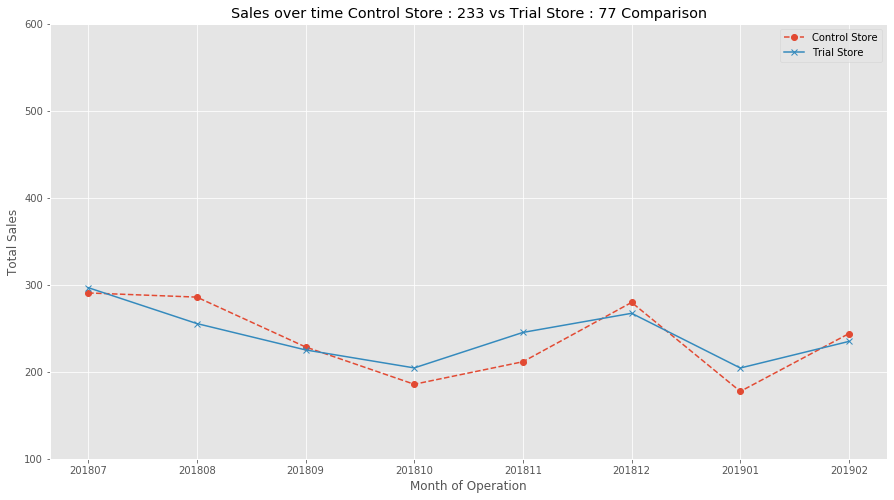

In [183]:
# Plots to visually see the if the factors - total sales are similar in Control Store and Trial Store 

fig = plt.figure(figsize=(15,8))


ax1 = plt.subplot(111)
ax1.plot(pretrial_stores['MONTH_ID'].drop_duplicates().astype(str), pretrial_stores[pretrial_stores['STORE_NBR']==233]['TOT_SALES'], 'o--', label='Control Store')
ax1.plot(pretrial_stores['MONTH_ID'].drop_duplicates().astype(str), 
trial_stores_metrics[(trial_stores_metrics['STORE_NBR']==77) & (trial_stores_metrics['MONTH_ID'] < 201903)]['TOT_SALES'], 
         'x-', label='Trial Store')

plt.ylim([100,600])
ax1.legend()
ax1.set_title('Sales over time Control Store : 233 vs Trial Store : 77 Comparison')
ax1.set_xlabel('Month of Operation')
ax1.set_ylabel('Total Sales')

plt.show()

<b>Number of Customers by month of operation in pre-trial period</b>

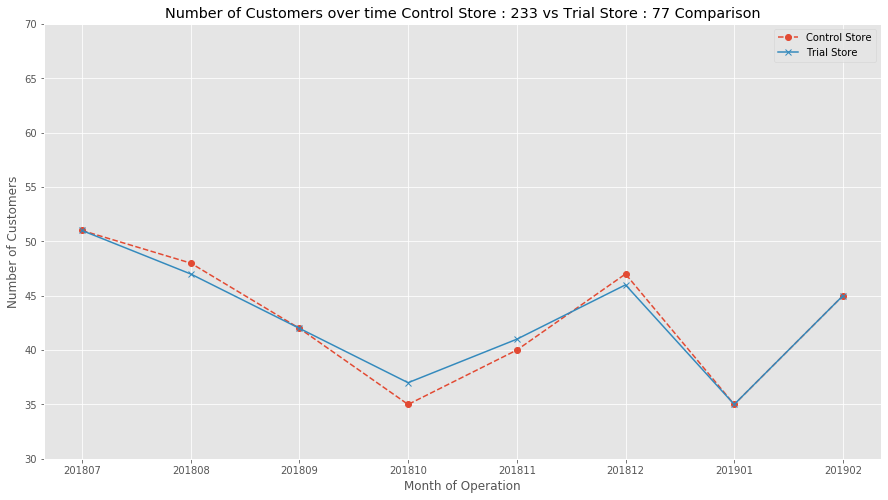

In [184]:
# Plots to visually see the if the factors - number of customers are similar in Control Store and Trial Store 

fig = plt.figure(figsize=(15,8))


ax1 = plt.subplot(111)
ax1.plot(pretrial_stores['MONTH_ID'].drop_duplicates().astype(str), pretrial_stores[pretrial_stores['STORE_NBR']==233]['Customer_Count'], 'o--', label='Control Store')
ax1.plot(pretrial_stores['MONTH_ID'].drop_duplicates().astype(str), 
trial_stores_metrics[(trial_stores_metrics['STORE_NBR']==77) & (trial_stores_metrics['MONTH_ID'] < 201903)]['Customer_Count'], 
         'x-', label='Trial Store')

plt.ylim([30,70])
ax1.legend()
ax1.set_title('Number of Customers over time Control Store : 233 vs Trial Store : 77 Comparison')
ax1.set_xlabel('Month of Operation')
ax1.set_ylabel('Number of Customers')
plt.show()

In [98]:
trial_stores_metrics[(trial_stores_metrics['STORE_NBR']==77) & (trial_stores_metrics['MONTH_ID'] < 201903)]['TOT_SALES']

73      296.8
338     255.5
603     225.2
868     204.5
1132    245.3
1396    267.3
1658    204.4
1921    235.0
Name: TOT_SALES, dtype: float64

In [99]:
trial_stores_metrics

,MONTH_ID,STORE_NBR,TOT_SALES,PROD_QTY,Customer_Count,Trans_Count,Avg_chips_price_per_trans,Num_Chips_per_Txn,Num_Trans_per_cust
73,201807,77,296.80,84,51,55,3.533333,1.527273,1.078431
82,201807,86,892.20,251,99,126,3.554582,1.992063,1.272727
84,201807,88,1310.00,306,129,153,4.281046,2.000000,1.186047
338,201808,77,255.50,74,47,48,3.452703,1.541667,1.021277
346,201808,86,764.05,215,94,110,3.553721,1.954545,1.170213
348,201808,88,1323.80,303,131,158,4.368977,1.917722,1.206107
603,201809,77,225.20,70,42,44,3.217143,1.590909,1.047619
611,201809,86,914.60,258,103,128,3.544961,2.015625,1.242718
613,201809,88,1423.00,318,124,157,4.474843,2.025478,1.266129
868,201810,77,204.50,52,37,38,3.932692,1.368421,1.027027


### Assessment of trial

The <b>trial period</b> goes from the <b>start of March 2019 to June 2019</b>. We now want to see if there has been an
uplift in overall chip sales.
We’ll start with scaling the control store’s sales to a level similar to control for any differences between the
two stores outside of the trial period.

### Trial Store 77

In [100]:
trial_store_nbr=77
control_store_nbr=233

In [101]:
# Function to scale pretrial control store sales and number of customers to match up with that of 
# pretrial trial store values

def get_scaling_factors(pretrial_stores, trial_store_nbr, control_store_nbr):
    
    scaling_factor_sales = pretrial_stores[pretrial_stores['STORE_NBR']==trial_store_nbr]['TOT_SALES'].sum()/pretrial_stores[pretrial_stores['STORE_NBR']==control_store_nbr]['TOT_SALES'].sum()
    scaling_factor_cust_count = pretrial_stores[pretrial_stores['STORE_NBR']==trial_store_nbr]['Customer_Count'].sum()/pretrial_stores[pretrial_stores['STORE_NBR']==control_store_nbr]['Customer_Count'].sum()
    
    return scaling_factor_sales, scaling_factor_cust_count

In [102]:
# Function to apply the sacling factors to total sales and customer count to get a dataframe with scaled values

def get_scaled_df(scaling_fact_sales, scaling_factor_cust_count, store_metrics, scaled_df , control_store_nbr):
    
    scaled_df['scaled_sales']= scaling_fact_sales*store_metrics[store_metrics['STORE_NBR']==control_store_nbr]['TOT_SALES']
    scaled_df['scaled_cust_count']= scaling_factor_cust_count*store_metrics[store_metrics['STORE_NBR']==control_store_nbr]['Customer_Count']
    
    return scaled_df

In [103]:
scaling_fact_sales = get_scaling_factors(pretrial_stores, trial_store_nbr, control_store_nbr)[0]
scaling_factor_cust_count = get_scaling_factors(pretrial_stores, trial_store_nbr, control_store_nbr)[1]

In [104]:
scaled_metric = store_metrics[store_metrics['STORE_NBR']==233]

In [105]:
scaled_metric = get_scaled_df(scaling_fact_sales, scaling_factor_cust_count, store_metrics, scaled_metric , 
                              control_store_nbr)

In [106]:
scaled_metric

,MONTH_ID,STORE_NBR,TOT_SALES,PROD_QTY,Customer_Count,Trans_Count,Avg_chips_price_per_trans,Num_Chips_per_Txn,Num_Trans_per_cust,scaled_sales,scaled_cust_count
227,201807,233,290.7,88,51,54,3.303409,1.629630,1.058824,295.311377,51.148688
489,201808,233,285.9,80,48,50,3.573750,1.600000,1.041667,290.435235,48.139942
754,201809,233,228.6,70,42,45,3.265714,1.555556,1.071429,232.226284,42.122449
1019,201810,233,185.7,56,35,36,3.316071,1.555556,1.028571,188.645761,35.102041
1283,201811,233,211.6,62,40,41,3.412903,1.512195,1.025000,214.956613,40.116618
1546,201812,233,279.8,75,47,50,3.730667,1.500000,1.063830,284.238470,47.137026
1809,201901,233,177.5,47,35,35,3.776596,1.342857,1.000000,180.315684,35.102041
2073,201902,233,244.0,70,45,47,3.485714,1.489362,1.044444,247.870575,45.131195
2337,201903,233,199.1,59,40,41,3.374576,1.439024,1.025000,202.258325,40.116618
2603,201904,233,158.6,46,30,32,3.447826,1.437500,1.066667,161.115874,30.087464


Now that we have comparable sales figures for the control store, we can calculate the percentage difference
between the scaled control sales and the trial store’s sales during the trial period.

In [107]:
# Function to get dataframe with the percentage difference between scaled control sales and trial sales 
# and also between their respective customer count values

def get_percent_diff_df(trial_stores_metrics, scaled_df, trial_store_nbr):
    
    percentDiff = pd.merge(trial_stores_metrics[trial_stores_metrics['STORE_NBR']==trial_store_nbr][['MONTH_ID', 'STORE_NBR', 'Customer_Count', 'TOT_SALES']], 
                       scaled_df[['MONTH_ID', 'STORE_NBR','scaled_sales', 'scaled_cust_count']], left_on = 'MONTH_ID',
                       right_on = 'MONTH_ID' , how='inner')
    
    percentDiff['percent_diff_sales'] = abs(percentDiff['scaled_sales'] - percentDiff['TOT_SALES']) / percentDiff['scaled_sales']
    percentDiff['percent_diff_cust_count'] = abs(percentDiff['scaled_cust_count'] - percentDiff['Customer_Count']) / percentDiff['scaled_cust_count']
    
    return percentDiff

In [108]:
# Calculate the percentage difference between scaled control sales / Customer Count and trial sales / Customer Count

percentDiff = get_percent_diff_df(trial_stores_metrics, scaled_metric, trial_store_nbr)

In [109]:
percentDiff

,MONTH_ID,STORE_NBR_x,Customer_Count,TOT_SALES,STORE_NBR_y,scaled_sales,scaled_cust_count,percent_diff_sales,percent_diff_cust_count
0,201807,77,51,296.8,233,295.311377,51.148688,0.005041,0.002907
1,201808,77,47,255.5,233,290.435235,48.139942,0.120286,0.023680
2,201809,77,42,225.2,233,232.226284,42.122449,0.030256,0.002907
3,201810,77,37,204.5,233,188.645761,35.102041,0.084042,0.054070
4,201811,77,41,245.3,233,214.956613,40.116618,0.141161,0.022020
5,201812,77,46,267.3,233,284.238470,47.137026,0.059592,0.024122
6,201901,77,35,204.4,233,180.315684,35.102041,0.133568,0.002907
7,201902,77,45,235.0,233,247.870575,45.131195,0.051925,0.002907
8,201903,77,50,278.5,233,202.258325,40.116618,0.376952,0.246366
9,201904,77,47,263.5,233,161.115874,30.087464,0.635469,0.562112


Let’s see if the difference is significant!

As our null hypothesis is that the trial period is the same as the pre‐trial period, let's take the standard deviation based on the scaled percentage difference in the pre‐trial period

In [110]:
std_dev_sales = np.std(percentDiff[percentDiff['MONTH_ID'] < 201902]['percent_diff_sales'])
std_dev_cust_count = np.std(percentDiff[percentDiff['MONTH_ID'] < 201902]['percent_diff_cust_count'])

In [111]:
print('Standard Deviation for Sales :{}'.format(std_dev_sales))
print('Standard Deviation for Customer Count :{}'.format(std_dev_cust_count))

Standard Deviation for Sales :0.04888963667024154
Standard Deviation for Customer Count :0.017171728910135936


In [112]:
# Function for calculating t-values

def conduct_t_test(percentDiff, std_dev_sales, std_dev_cust_count):

    percentDiff['t-value_sales'] = (percentDiff['percent_diff_sales']-0)/std_dev_sales
    percentDiff['t-value_cust_count'] = (percentDiff['percent_diff_cust_count']-0)/std_dev_cust_count
    
    return percentDiff

In [113]:
percentDiff = conduct_t_test(percentDiff, std_dev_sales, std_dev_cust_count)

In [114]:
percentDiff

,MONTH_ID,STORE_NBR_x,Customer_Count,TOT_SALES,STORE_NBR_y,scaled_sales,scaled_cust_count,percent_diff_sales,percent_diff_cust_count,t-value_sales,t-value_cust_count
0,201807,77,51,296.8,233,295.311377,51.148688,0.005041,0.002907,0.103107,0.169289
1,201808,77,47,255.5,233,290.435235,48.139942,0.120286,0.023680,2.460354,1.378996
2,201809,77,42,225.2,233,232.226284,42.122449,0.030256,0.002907,0.618867,0.169289
3,201810,77,37,204.5,233,188.645761,35.102041,0.084042,0.054070,1.719022,3.148767
4,201811,77,41,245.3,233,214.956613,40.116618,0.141161,0.022020,2.887330,1.282361
5,201812,77,46,267.3,233,284.238470,47.137026,0.059592,0.024122,1.218918,1.404735
6,201901,77,35,204.4,233,180.315684,35.102041,0.133568,0.002907,2.732021,0.169289
7,201902,77,45,235.0,233,247.870575,45.131195,0.051925,0.002907,1.062077,0.169289
8,201903,77,50,278.5,233,202.258325,40.116618,0.376952,0.246366,7.710263,14.347203
9,201904,77,47,263.5,233,161.115874,30.087464,0.635469,0.562112,12.998029,32.734759


In [115]:
percentDiff[(percentDiff['MONTH_ID'] < 201905) & (percentDiff['MONTH_ID'] > 201901)][['MONTH_ID', 't-value_sales', 
                                                                                      't-value_cust_count']]

,MONTH_ID,t-value_sales,t-value_cust_count
7,201902,1.062077,0.169289
8,201903,7.710263,14.347203
9,201904,12.998029,32.734759


In [116]:
#Find the 95th percentile of the t distribution with the appropriate degrees of freedom to compare against
stats.t(df=7).ppf(0.95)

1.894578605061305

We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March
and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the
control store.

Let’s create a more visual version of this by plotting the sales of the control store, the sales of the trial stores
and the 95th percentile value of sales of the control store.

In [117]:
sales_over_time = cust_count_over_time = cust_purchase_data

In [118]:
def get_type(cols):
    store_num = cols[0]
    
    if store_num==control_store_nbr:
        return 'Control Store'
    elif store_num==trial_store_nbr:
        return 'Trial Store'
    else :
        return 'Other Store'

In [119]:
sales_over_time['Store_Type'] = sales_over_time[['STORE_NBR']].apply(get_type, axis=1)
cust_count_over_time['Store_Type'] = cust_count_over_time[['STORE_NBR']].apply(get_type, axis=1)

In [120]:
cust_count_over_time.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER', 'DATE_DT', 'year', 'month', 'MONTH_ID',
       'Store_Type'],
      dtype='object')

In [121]:
sales_by_store_type = sales_over_time.groupby(['MONTH_ID', 'Store_Type']).agg(
    {'TOT_SALES' : lambda s : np.sum(s)}).reset_index()

In [122]:
cust_count_by_store_type = sales_over_time.groupby(['MONTH_ID', 'Store_Type']).agg(
    {'LYLTY_CARD_NBR' : ['nunique']}).reset_index()

# To flatten Multi-level index

cust_count_by_store_type.columns = ["".join(col).strip() for col in cust_count_by_store_type.columns.values]

# Reseting index

cust_count_by_store_type = cust_count_by_store_type.reset_index()

In [123]:
cust_count_by_store_type.rename(columns={'LYLTY_CARD_NBRnunique' : 'nCustomers'}, inplace=True)

In [124]:
sales_by_store_type = sales_by_store_type[sales_by_store_type['Store_Type'].isin(["Control Store", "Trial Store"])]

In [125]:
cust_count_by_store_type = cust_count_by_store_type[cust_count_by_store_type['Store_Type'].isin(
    ["Control Store", "Trial Store"])]

In [126]:
def get_nth_percentile(sales_over_time, metric, n, std_dev_calc):
    
    metric_control_n = sales_over_time[sales_over_time['Store_Type']=='Control Store']
    metric_control_n[metric] = metric_control_n[metric] * std_dev_calc
    metric_control_n['Store_Type'] = 'Control '+str(n)+'th % confidence interval'
    
    return metric_control_n

In [127]:
# Control store 95th percentile

sales_control_95 = get_nth_percentile(sales_by_store_type, 'TOT_SALES', 95, 1+(std_dev_sales*2))
cust_count_control_95 = get_nth_percentile(cust_count_by_store_type, 'nCustomers', 95, 1+(std_dev_cust_count*2))

In [128]:
# Control store 5th percentile

sales_control_5 = get_nth_percentile(sales_by_store_type, 'TOT_SALES', 5, 1-(std_dev_sales*2))
cust_count_control_5 = get_nth_percentile(cust_count_by_store_type, 'nCustomers', 5, 1-(std_dev_cust_count*2))

In [129]:
# Merging all trail metrics into one dataframe

trial_assessment_sales = pd.concat([sales_by_store_type, sales_control_95, sales_control_5], ignore_index=True)
trial_assessment_cust_count = pd.concat([cust_count_by_store_type, cust_count_control_95, cust_count_control_5], 
                                   ignore_index=True)

In [130]:
year_months = trial_assessment_sales[['MONTH_ID']].sort_values(['MONTH_ID']).drop_duplicates().astype(str)

<b> Total Sales by month of operation in trial period</b>

In [131]:
# Function for plotting all calculated metrics into a graph

def plot_line_chart(year_months, trial_assessment, metric):
    fig = plt.figure(figsize=(15,8))


    ax = plt.subplot(111)
    ax.plot(year_months['MONTH_ID'], trial_assessment[trial_assessment['Store_Type']=='Control Store'].groupby(['MONTH_ID'])[[metric]].sum(), label='Control Store')
    ax.plot(year_months['MONTH_ID'], trial_assessment[trial_assessment['Store_Type']=='Control 95th % confidence interval'].groupby(['MONTH_ID'])[[metric]].sum(), 'x--', label='Control 95th % confidence interval')
    ax.plot(year_months['MONTH_ID'], trial_assessment[trial_assessment['Store_Type']=='Control 5th % confidence interval'].groupby(['MONTH_ID'])[[metric]].sum(), 'o--', label='Control 5th % confidence interval')
    ax.plot(year_months['MONTH_ID'], trial_assessment[trial_assessment['Store_Type']=='Trial Store'].groupby(['MONTH_ID'])[[metric]].sum(), label='Trial Store')

    ax.legend()
    
    ax.set_xlabel('Month of Operation')
    
    label = ''
    
    if metric=='TOT_SALES':
        label='Total Sales'
    else :
        label = 'Number of Customers'
    
    ax.set_title(label+' by month')
    ax.set_ylabel(label)

    plt.show()
    return 

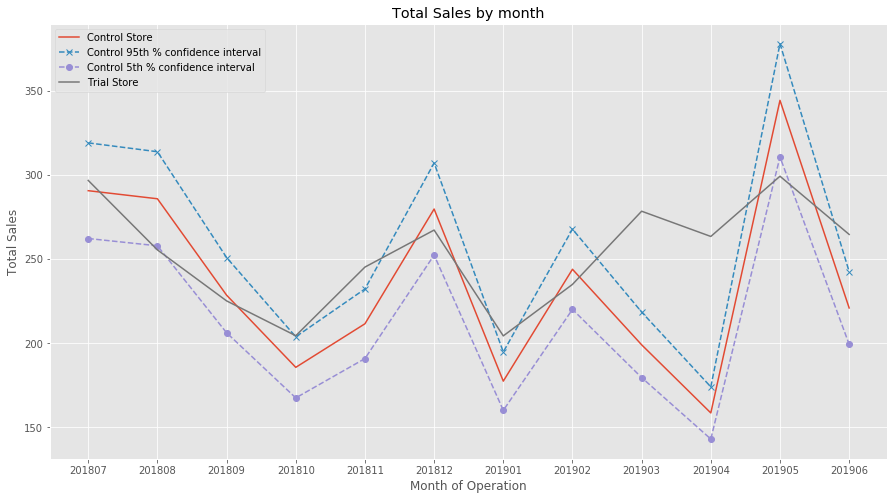

In [132]:
# Plotting all the calculated total sales metrics in a graph

plot_line_chart(year_months, trial_assessment_sales, 'TOT_SALES')

The above chart shows that the store 77 is different to its control store 233 in the trial period. The trial store sales performance lies above / beyond the 5% and 95% confidence interval of control store in two of the three trial period months.

<b> Analysis of Number of Customers by month of operation in trial period </b>

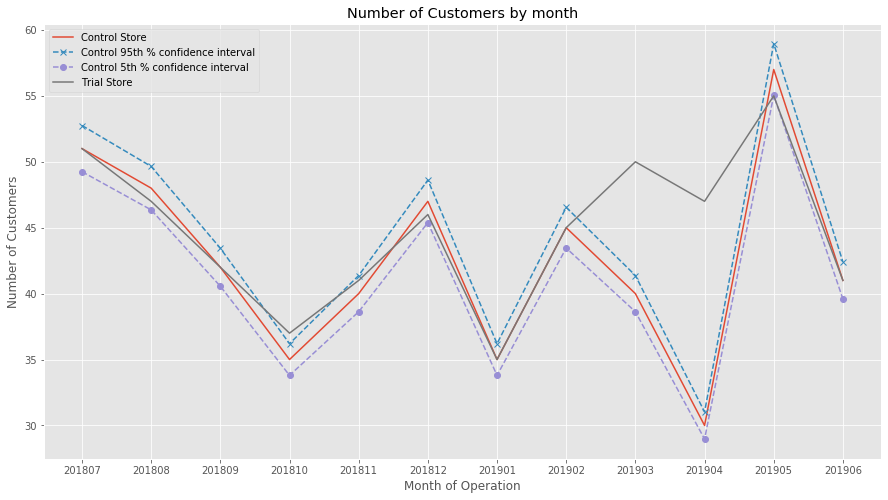

In [133]:
# Plotting all the calculated customer count metrics in a graph

plot_line_chart(year_months, trial_assessment_cust_count, 'nCustomers')

We need to repeat the analysis for the other two trial stores.

### Trial Store 86

In [134]:
# for trial store 86
max_control_score = np.max(scores[scores['Trial_Store_Nbr']==86]['control_score'])

scores[scores['control_score']==max_control_score]['STORE_NBR']

433    155
Name: STORE_NBR, dtype: object

Comparing with store number 86, the store with the maximum control score is 155 ie. store number : 155 has maximum correlation with store number 86.

<b> Total Sales by month of operation in pre-trial period</b>

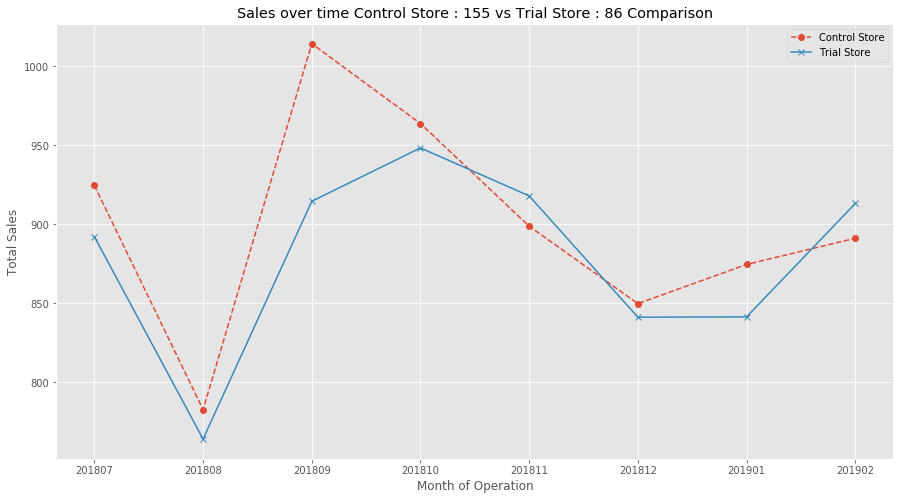

In [185]:
# Plots to visually see the if the factors - total sales are similar in Control Store and Trial Store 

fig = plt.figure(figsize=(15,8))


ax2 = plt.subplot(111)
ax2.plot(pretrial_stores['MONTH_ID'].drop_duplicates().astype(str), pretrial_stores[pretrial_stores['STORE_NBR']==155]['TOT_SALES'], 'o--', label='Control Store')
ax2.plot(pretrial_stores['MONTH_ID'].drop_duplicates().astype(str), 
trial_stores_metrics[(trial_stores_metrics['STORE_NBR']==86) & (trial_stores_metrics['MONTH_ID'] < 201903)]['TOT_SALES'], 
         'x-', label='Trial Store')

ax2.legend()
ax2.set_title('Sales over time Control Store : 155 vs Trial Store : 86 Comparison')
ax2.set_xlabel('Month of Operation')
ax2.set_ylabel('Total Sales')

plt.show()

The trend in sales is similar

<b> Number of customers by month of operation in pre-trial period</b>

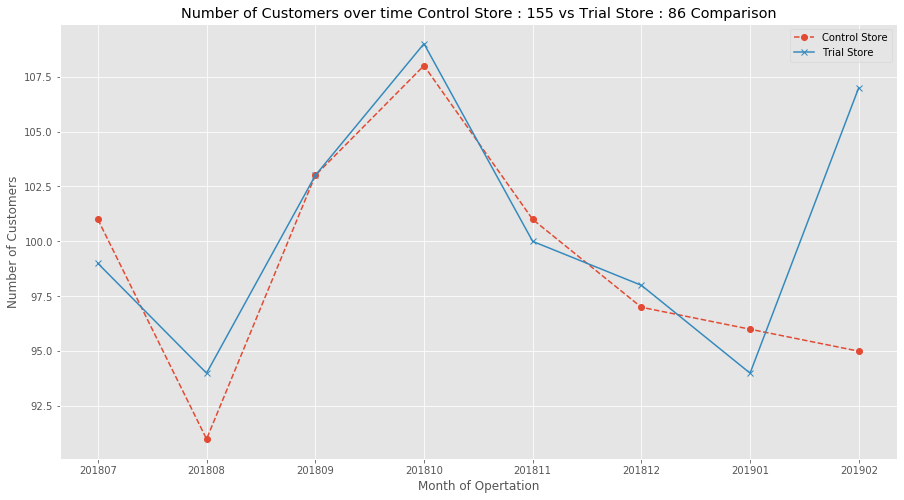

In [186]:
# Plots to visually see the if the factors - number of customers are similar in Control Store and Trial Store 

fig = plt.figure(figsize=(15,8))


ax1 = plt.subplot(111)
ax1.plot(pretrial_stores['MONTH_ID'].drop_duplicates().astype(str), pretrial_stores[pretrial_stores['STORE_NBR']==155]['Customer_Count'], 'o--', label='Control Store')
ax1.plot(pretrial_stores['MONTH_ID'].drop_duplicates().astype(str), 
trial_stores_metrics[(trial_stores_metrics['STORE_NBR']==86) & (trial_stores_metrics['MONTH_ID'] < 201903)]['Customer_Count'], 
         'x-', label='Trial Store')

ax1.legend()
ax1.set_title('Number of Customers over time Control Store : 155 vs Trial Store : 86 Comparison')
ax1.set_xlabel('Month of Opertation')
ax1.set_ylabel('Number of Customers')
plt.show()

The trend in number of customers is also similar

<b>Impact of trial on sales</b>

In [137]:
trial_store_nbr=86
control_store_nbr=155

In [138]:
# Calculation of scaling factors to scale pretrial control store sales and number of customers to match up with that of 
# pretrial trial store values

scaling_fact_sales = get_scaling_factors(pretrial_stores, trial_store_nbr, control_store_nbr)[0]
scaling_factor_cust_count = get_scaling_factors(pretrial_stores, trial_store_nbr, control_store_nbr)[1]

scaled_metric = store_metrics[store_metrics['STORE_NBR']==control_store_nbr]

scaled_metric = get_scaled_df(scaling_fact_sales, scaling_factor_cust_count, store_metrics, scaled_metric , 
                              control_store_nbr)

scaled_metric

,MONTH_ID,STORE_NBR,TOT_SALES,PROD_QTY,Customer_Count,Trans_Count,Avg_chips_price_per_trans,Num_Chips_per_Txn,Num_Trans_per_cust,scaled_sales,scaled_cust_count
150,201807,155,924.60,250,101,123,3.698400,2.032520,1.217822,903.173382,102.530303
414,201808,155,782.70,229,91,119,3.417904,1.924370,1.307692,764.561763,92.378788
679,201809,155,1014.40,290,103,144,3.497931,2.013889,1.398058,990.892362,104.560606
944,201810,155,963.80,272,108,136,3.543382,2.000000,1.259259,941.464963,109.636364
1208,201811,155,898.80,270,101,133,3.328889,2.030075,1.316832,877.971269,102.530303
1472,201812,155,849.80,242,97,120,3.511570,2.016667,1.237113,830.106792,98.469697
1733,201901,155,874.60,252,96,125,3.470635,2.016000,1.302083,854.332078,97.454545
1997,201902,155,891.20,254,95,125,3.508661,2.032000,1.315789,870.547391,96.439394
2262,201903,155,804.40,240,94,118,3.351667,2.033898,1.255319,785.758888,95.424242
2526,201904,155,844.60,242,99,120,3.490083,2.016667,1.212121,825.027296,100.500000


In [139]:
# Calculate the percentage difference between scaled control sales / Customer Count and trial sales / Customer Count

percentDiff = get_percent_diff_df(trial_stores_metrics, scaled_metric, trial_store_nbr)

percentDiff

,MONTH_ID,STORE_NBR_x,Customer_Count,TOT_SALES,STORE_NBR_y,scaled_sales,scaled_cust_count,percent_diff_sales,percent_diff_cust_count
0,201807,86,99,892.20,155,903.173382,102.530303,0.012150,0.034432
1,201808,86,94,764.05,155,764.561763,92.378788,0.000669,0.017550
2,201809,86,103,914.60,155,990.892362,104.560606,0.076994,0.014925
3,201810,86,109,948.40,155,941.464963,109.636364,0.007366,0.005804
4,201811,86,100,918.00,155,877.971269,102.530303,0.045592,0.024679
5,201812,86,98,841.20,155,830.106792,98.469697,0.013364,0.004770
6,201901,86,94,841.40,155,854.332078,97.454545,0.015137,0.035448
7,201902,86,107,913.20,155,870.547391,96.439394,0.048995,0.109505
8,201903,86,115,1026.80,155,785.758888,95.424242,0.306762,0.205144
9,201904,86,105,848.20,155,825.027296,100.500000,0.028087,0.044776


In [140]:
std_dev_sales = np.std(percentDiff[percentDiff['MONTH_ID'] < 201902]['percent_diff_sales'])
std_dev_cust_count = np.std(percentDiff[percentDiff['MONTH_ID'] < 201902]['percent_diff_cust_count'])

In [141]:
print('Standard Deviation for Sales :{}'.format(std_dev_sales))
print('Standard Deviation for Customer Count :{}'.format(std_dev_cust_count))

Standard Deviation for Sales :0.025145668729412256
Standard Deviation for Customer Count :0.011546238618429575


In [142]:
percentDiff = conduct_t_test(percentDiff, std_dev_sales, std_dev_cust_count)

In [143]:
percentDiff

,MONTH_ID,STORE_NBR_x,Customer_Count,TOT_SALES,STORE_NBR_y,scaled_sales,scaled_cust_count,percent_diff_sales,percent_diff_cust_count,t-value_sales,t-value_cust_count
0,201807,86,99,892.20,155,903.173382,102.530303,0.012150,0.034432,0.483177,2.982079
1,201808,86,94,764.05,155,764.561763,92.378788,0.000669,0.017550,0.026619,1.519942
2,201809,86,103,914.60,155,990.892362,104.560606,0.076994,0.014925,3.061903,1.292661
3,201810,86,109,948.40,155,941.464963,109.636364,0.007366,0.005804,0.292942,0.502702
4,201811,86,100,918.00,155,877.971269,102.530303,0.045592,0.024679,1.813127,2.137370
5,201812,86,98,841.20,155,830.106792,98.469697,0.013364,0.004770,0.531447,0.413118
6,201901,86,94,841.40,155,854.332078,97.454545,0.015137,0.035448,0.601975,3.070070
7,201902,86,107,913.20,155,870.547391,96.439394,0.048995,0.109505,1.948453,9.484050
8,201903,86,115,1026.80,155,785.758888,95.424242,0.306762,0.205144,12.199404,17.767214
9,201904,86,105,848.20,155,825.027296,100.500000,0.028087,0.044776,1.116980,3.877983


In [144]:
percentDiff[(percentDiff['MONTH_ID'] < 201905) & (percentDiff['MONTH_ID'] > 201901)][['MONTH_ID', 't-value_sales', 
                                                                                      't-value_cust_count']]

,MONTH_ID,t-value_sales,t-value_cust_count
7,201902,1.948453,9.484050
8,201903,12.199404,17.767214
9,201904,1.116980,3.877983


In [145]:
#Find the 95th percentile of the t distribution with the appropriate degrees of freedom to compare against
stats.t(df=7).ppf(0.95)

1.894578605061305

In [146]:
sales_over_time = cust_count_over_time = cust_purchase_data

In [147]:
sales_over_time['Store_Type'] = sales_over_time[['STORE_NBR']].apply(get_type, axis=1)
cust_count_over_time['Store_Type'] = cust_count_over_time[['STORE_NBR']].apply(get_type, axis=1)

In [148]:
sales_by_store_type = sales_over_time.groupby(['MONTH_ID', 'Store_Type']).agg(
    {'TOT_SALES' : lambda s : np.sum(s)}).reset_index()

In [149]:
cust_count_by_store_type = sales_over_time.groupby(['MONTH_ID', 'Store_Type']).agg(
    {'LYLTY_CARD_NBR' : ['nunique']}).reset_index()

# To flatten Multi-level index

cust_count_by_store_type.columns = ["".join(col).strip() for col in cust_count_by_store_type.columns.values]

# Reseting index

cust_count_by_store_type = cust_count_by_store_type.reset_index()

In [150]:
cust_count_by_store_type.rename(columns={'LYLTY_CARD_NBRnunique' : 'nCustomers'}, inplace=True)

In [151]:
sales_by_store_type = sales_by_store_type[sales_by_store_type['Store_Type'].isin(["Control Store", "Trial Store"])]

In [152]:
cust_count_by_store_type = cust_count_by_store_type[cust_count_by_store_type['Store_Type'].isin(
    ["Control Store", "Trial Store"])]

In [153]:
# Control store 95th percentile

sales_control_95 = get_nth_percentile(sales_by_store_type, 'TOT_SALES', 95, 1+(std_dev_sales*2))
cust_count_control_95 = get_nth_percentile(cust_count_by_store_type, 'nCustomers', 95, 1+(std_dev_cust_count*2))

In [154]:
# Control store 5th percentile

sales_control_5 = get_nth_percentile(sales_by_store_type, 'TOT_SALES', 5, 1-(std_dev_sales*2))
cust_count_control_5 = get_nth_percentile(cust_count_by_store_type, 'nCustomers', 5, 1-(std_dev_cust_count*2))

In [155]:
# Merging all trail metrics into one dataframe

trial_assessment_sales = pd.concat([sales_by_store_type, sales_control_95, sales_control_5], ignore_index=True)
trial_assessment_cust_count = pd.concat([cust_count_by_store_type, cust_count_control_95, cust_count_control_5], 
                                   ignore_index=True)

<b> Total Sales by month of operation in trial period</b>

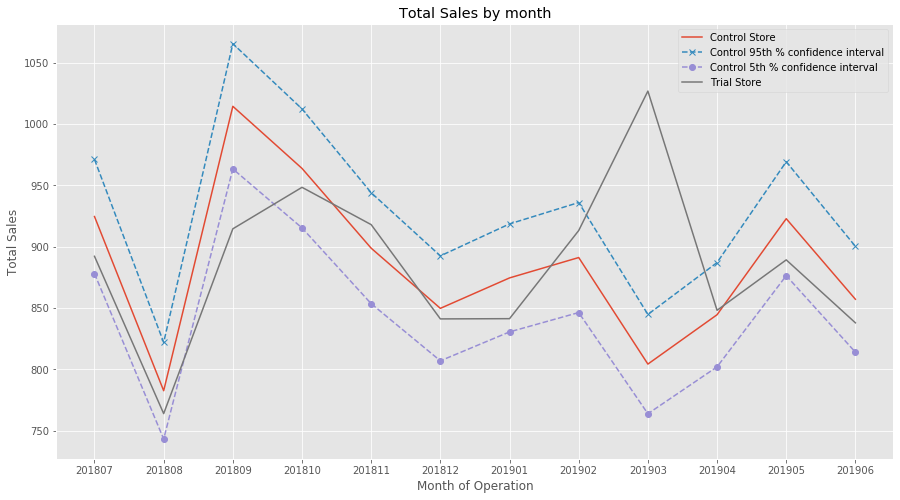

In [156]:
# Plotting all the trial sales metrics in a graph

plot_line_chart(year_months, trial_assessment_sales, 'TOT_SALES')

The above chart shows that the store 86 is not significantly different to its control store 233 in the trial period. The trial store sales performance lies within the 5% and 95% confidence interval of control store in two of the three trial period months.

<b> Number of Customers by month in trial period </b>

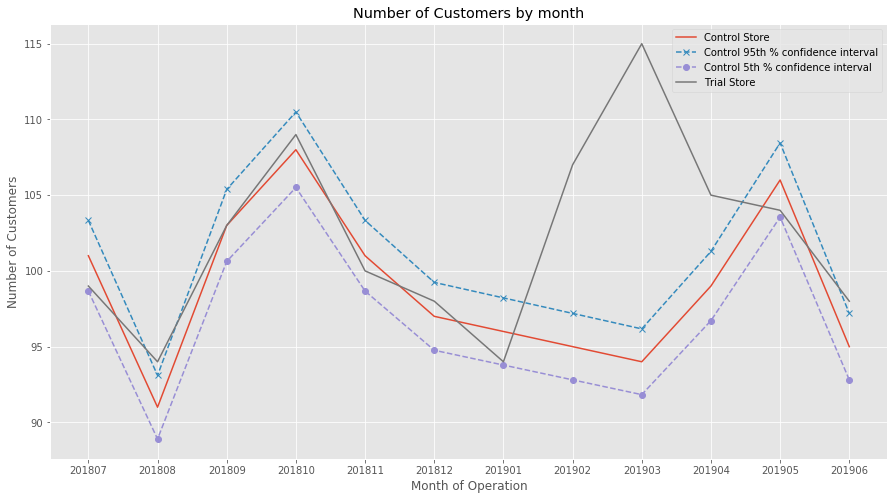

In [157]:
# Plotting all the trial Number of Customers metrics in a graph

plot_line_chart(year_months, trial_assessment_cust_count, 'nCustomers')

It looks like the number of customers is significantly higher in all of the three months. This seems to
suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but
as we saw, sales were not significantly higher.

### Trial Store 88

In [158]:
# for trial store 88
max_control_score = np.max(scores[scores['Trial_Store_Nbr']==88]['control_score'])

scores[scores['control_score']==max_control_score]['STORE_NBR']

668    237
Name: STORE_NBR, dtype: object

Comparing with store number 88, the store with the maximum control score is 237 ie. store number : 237 has maximum correlation with store number 88.

<b> Total Sales by month of operation in pre-trial period </b>

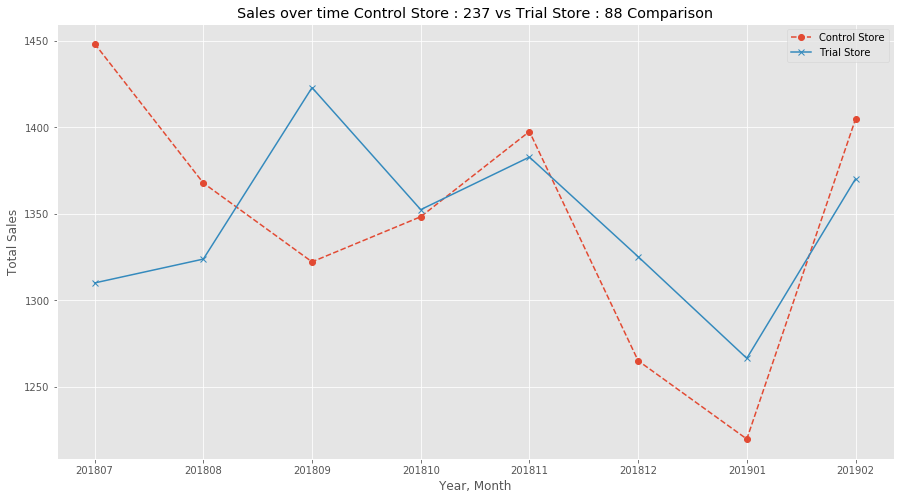

In [159]:
# Plots to visually see the if the factors - total sales are similar in Control Store and Trial Store 

fig = plt.figure(figsize=(15,8))


ax2 = plt.subplot(111)
ax2.plot(pretrial_stores['MONTH_ID'].drop_duplicates().astype(str), pretrial_stores[pretrial_stores['STORE_NBR']==237]['TOT_SALES'], 'o--', label='Control Store')
ax2.plot(pretrial_stores['MONTH_ID'].drop_duplicates().astype(str), 
trial_stores_metrics[(trial_stores_metrics['STORE_NBR']==88) & (trial_stores_metrics['MONTH_ID'] < 201903)]['TOT_SALES'], 
         'x-', label='Trial Store')

ax2.legend()
ax2.set_title('Sales over time Control Store : 237 vs Trial Store : 88 Comparison')
ax2.set_xlabel('Month of Operation')
ax2.set_ylabel('Total Sales')

plt.show()

The trial and control stores have similar trend in sales

<b> Number of customers by month of operation in pre-trial period </b>

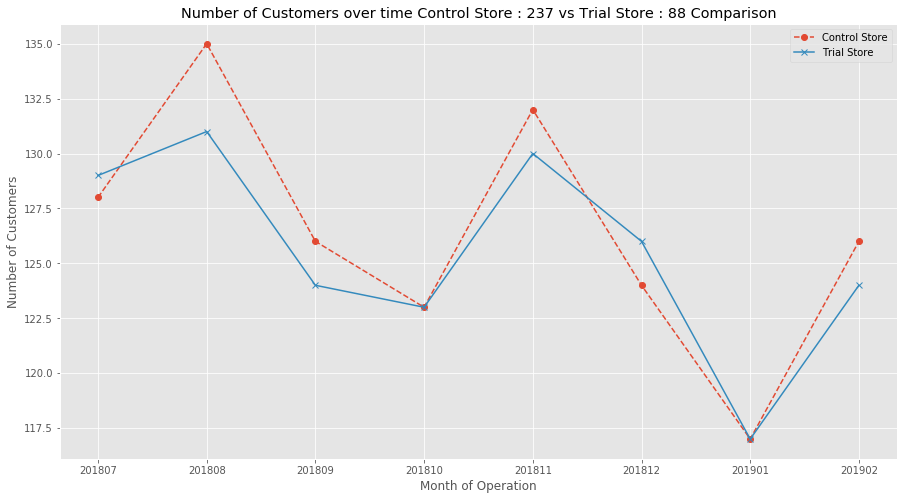

In [187]:
# Plots to visually see the if the factors - Number of customers are similar in Control Store and Trial Store 

fig = plt.figure(figsize=(15,8))


ax1 = plt.subplot(111)
ax1.plot(pretrial_stores['MONTH_ID'].drop_duplicates().astype(str), pretrial_stores[pretrial_stores['STORE_NBR']==237]['Customer_Count'], 'o--', label='Control Store')
ax1.plot(pretrial_stores['MONTH_ID'].drop_duplicates().astype(str), 
trial_stores_metrics[(trial_stores_metrics['STORE_NBR']==88) & (trial_stores_metrics['MONTH_ID'] < 201903)]['Customer_Count'], 
         'x-', label='Trial Store')

ax1.legend()
ax1.set_title('Number of Customers over time Control Store : 237 vs Trial Store : 88 Comparison')
ax1.set_xlabel('Month of Operation')
ax1.set_ylabel('Number of Customers')
plt.show()

The trial and control stores have similar trend in number of customers

In [161]:
trial_store_nbr=88
control_store_nbr=237

In [162]:
# Calculation of scaling factors to scale pretrial control store sales and number of customers to match up with that of 
# pretrial trial store values

scaling_fact_sales = get_scaling_factors(pretrial_stores, trial_store_nbr, control_store_nbr)[0]
scaling_factor_cust_count = get_scaling_factors(pretrial_stores, trial_store_nbr, control_store_nbr)[1]

scaled_metric = store_metrics[store_metrics['STORE_NBR']==control_store_nbr]

scaled_metric = get_scaled_df(scaling_fact_sales, scaling_factor_cust_count, store_metrics, scaled_metric , 
                              control_store_nbr)

scaled_metric

,MONTH_ID,STORE_NBR,TOT_SALES,PROD_QTY,Customer_Count,Trans_Count,Avg_chips_price_per_trans,Num_Chips_per_Txn,Num_Trans_per_cust,scaled_sales,scaled_cust_count
231,201807,237,1448.4,324,128,162,4.470370,2.000000,1.265625,1445.711255,127.113749
493,201808,237,1367.8,313,135,165,4.369968,1.896970,1.222222,1365.260877,134.065282
758,201809,237,1322.2,299,126,149,4.422074,2.006711,1.182540,1319.745527,125.127596
1023,201810,237,1348.3,299,123,147,4.509365,2.034014,1.195122,1345.797076,122.148368
1287,201811,237,1397.6,320,132,161,4.367500,1.987578,1.219697,1395.005558,131.086053
1550,201812,237,1265.0,289,124,144,4.377163,2.006944,1.161290,1262.651711,123.141444
1813,201901,237,1219.7,277,117,139,4.403249,1.992806,1.188034,1217.435804,116.189911
2077,201902,237,1404.8,314,126,157,4.473885,2.000000,1.246032,1402.192192,125.127596
2341,201903,237,1208.2,274,119,134,4.409489,2.044776,1.126050,1205.957152,118.176063
2607,201904,237,1204.6,272,120,135,4.428676,2.014815,1.125000,1202.363834,119.169139


In [163]:
# Calculate the percentage difference between scaled control sales / Customer Count and trial sales / Customer Count

percentDiff = get_percent_diff_df(trial_stores_metrics, scaled_metric, trial_store_nbr)

percentDiff

,MONTH_ID,STORE_NBR_x,Customer_Count,TOT_SALES,STORE_NBR_y,scaled_sales,scaled_cust_count,percent_diff_sales,percent_diff_cust_count
0,201807,88,129,1310.00,237,1445.711255,127.113749,0.093872,0.014839
1,201808,88,131,1323.80,237,1365.260877,134.065282,0.030368,0.022864
2,201809,88,124,1423.00,237,1319.745527,125.127596,0.078238,0.009012
3,201810,88,123,1352.40,237,1345.797076,122.148368,0.004906,0.006972
4,201811,88,130,1382.80,237,1395.005558,131.086053,0.008749,0.008285
5,201812,88,126,1325.20,237,1262.651711,123.141444,0.049537,0.023214
6,201901,88,117,1266.40,237,1217.435804,116.189911,0.040219,0.006972
7,201902,88,124,1370.20,237,1402.192192,125.127596,0.022816,0.009012
8,201903,88,134,1477.20,237,1205.957152,118.176063,0.224919,0.133901
9,201904,88,128,1439.40,237,1202.363834,119.169139,0.197142,0.074104


In [164]:
std_dev_sales = np.std(percentDiff[percentDiff['MONTH_ID'] < 201902]['percent_diff_sales'])
std_dev_cust_count = np.std(percentDiff[percentDiff['MONTH_ID'] < 201902]['percent_diff_cust_count'])

In [165]:
print('Standard Deviation for Sales :{}'.format(std_dev_sales))
print('Standard Deviation for Customer Count :{}'.format(std_dev_cust_count))

Standard Deviation for Sales :0.030846358066974677
Standard Deviation for Customer Count :0.006714781811502562


In [166]:
percentDiff = conduct_t_test(percentDiff, std_dev_sales, std_dev_cust_count)

In [167]:
percentDiff

,MONTH_ID,STORE_NBR_x,Customer_Count,TOT_SALES,STORE_NBR_y,scaled_sales,scaled_cust_count,percent_diff_sales,percent_diff_cust_count,t-value_sales,t-value_cust_count
0,201807,88,129,1310.00,237,1445.711255,127.113749,0.093872,0.014839,3.043199,2.209913
1,201808,88,131,1323.80,237,1365.260877,134.065282,0.030368,0.022864,0.984507,3.405040
2,201809,88,124,1423.00,237,1319.745527,125.127596,0.078238,0.009012,2.536383,1.342050
3,201810,88,123,1352.40,237,1345.797076,122.148368,0.004906,0.006972,0.159057,1.038323
4,201811,88,130,1382.80,237,1395.005558,131.086053,0.008749,0.008285,0.283647,1.233851
5,201812,88,126,1325.20,237,1262.651711,123.141444,0.049537,0.023214,1.605935,3.457089
6,201901,88,117,1266.40,237,1217.435804,116.189911,0.040219,0.006972,1.303853,1.038323
7,201902,88,124,1370.20,237,1402.192192,125.127596,0.022816,0.009012,0.739661,1.342050
8,201903,88,134,1477.20,237,1205.957152,118.176063,0.224919,0.133901,7.291595,19.941284
9,201904,88,128,1439.40,237,1202.363834,119.169139,0.197142,0.074104,6.391088,11.035889


In [168]:
percentDiff[(percentDiff['MONTH_ID'] < 201905) & (percentDiff['MONTH_ID'] > 201901)][['MONTH_ID', 't-value_sales', 
                                                                                      't-value_cust_count']]

,MONTH_ID,t-value_sales,t-value_cust_count
7,201902,0.739661,1.342050
8,201903,7.291595,19.941284
9,201904,6.391088,11.035889


In [169]:
#Find the 95th percentile of the t distribution with the appropriate degrees of freedom to compare against
stats.t(df=7).ppf(0.95)

1.894578605061305

In [170]:
sales_over_time = cust_count_over_time = cust_purchase_data

In [171]:
sales_over_time['Store_Type'] = sales_over_time[['STORE_NBR']].apply(get_type, axis=1)
cust_count_over_time['Store_Type'] = cust_count_over_time[['STORE_NBR']].apply(get_type, axis=1)

In [172]:
sales_by_store_type = sales_over_time.groupby(['MONTH_ID', 'Store_Type']).agg(
    {'TOT_SALES' : lambda s : np.sum(s)}).reset_index()

In [173]:
cust_count_by_store_type = sales_over_time.groupby(['MONTH_ID', 'Store_Type']).agg(
    {'LYLTY_CARD_NBR' : ['nunique']}).reset_index()

# To flatten Multi-level index

cust_count_by_store_type.columns = ["".join(col).strip() for col in cust_count_by_store_type.columns.values]

# Reseting index

cust_count_by_store_type = cust_count_by_store_type.reset_index()

In [174]:
cust_count_by_store_type.rename(columns={'LYLTY_CARD_NBRnunique' : 'nCustomers'}, inplace=True)

In [175]:
sales_by_store_type = sales_by_store_type[sales_by_store_type['Store_Type'].isin(["Control Store", "Trial Store"])]

In [176]:
cust_count_by_store_type = cust_count_by_store_type[cust_count_by_store_type['Store_Type'].isin(
    ["Control Store", "Trial Store"])]

In [177]:
# Control store 95th percentile

sales_control_95 = get_nth_percentile(sales_by_store_type, 'TOT_SALES', 95, 1+(std_dev_sales*2))
cust_count_control_95 = get_nth_percentile(cust_count_by_store_type, 'nCustomers', 95, 1+(std_dev_cust_count*2))

In [178]:
# Control store 5th percentile

sales_control_5 = get_nth_percentile(sales_by_store_type, 'TOT_SALES', 5, 1-(std_dev_sales*2))
cust_count_control_5 = get_nth_percentile(cust_count_by_store_type, 'nCustomers', 5, 1-(std_dev_cust_count*2))

In [179]:
# Merging all trail metrics into one dataframe

trial_assessment_sales = pd.concat([sales_by_store_type, sales_control_95, sales_control_5], ignore_index=True)
trial_assessment_cust_count = pd.concat([cust_count_by_store_type, cust_count_control_95, cust_count_control_5], 
                                   ignore_index=True)

<b> Total Sales by month of operation in trial period</b>

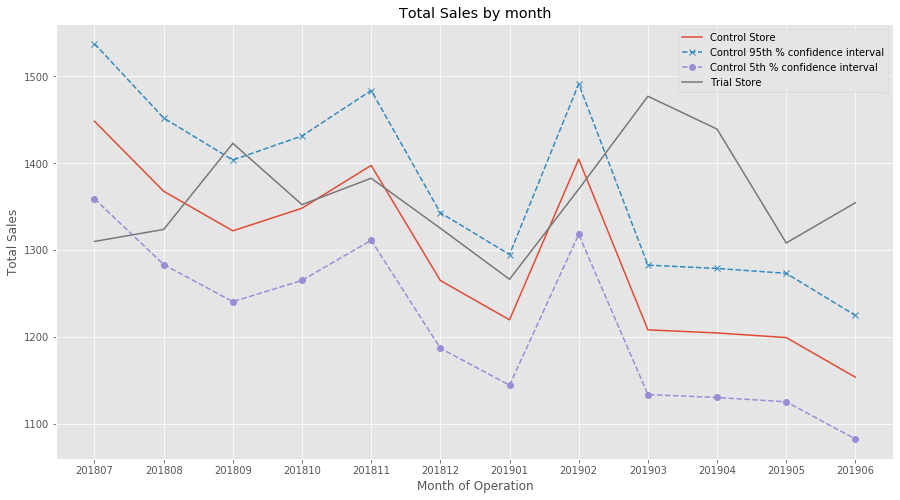

In [180]:
# Plotting all the calculated sales metrics in a graph

plot_line_chart(year_months, trial_assessment_sales, 'TOT_SALES')

The above chart shows that the store 88 is different to its control store 237 in the trial period. The trial store sales performance lies above / beyond the 5% and 95% confidence interval of control store in two of the three trial period months.

<b> Analysis of Number of Customers by month of operation in trial period </b>

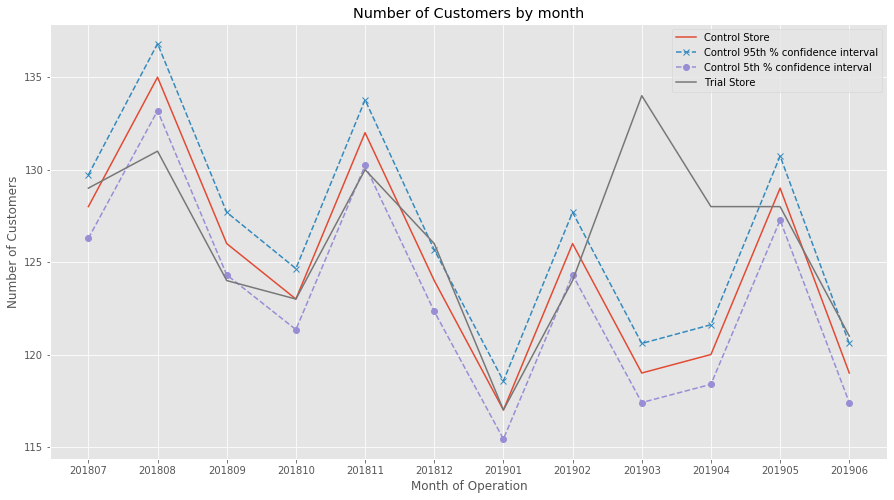

In [181]:
# Plotting all the calculated Number of Customers metrics in a graph

plot_line_chart(year_months, trial_assessment_cust_count, 'nCustomers')

The total number of customers in the trial store is significantly higher than the control store for two out of the three months